In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer #Reemplazo de datos faltantes
import numpy as np

datos = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/Post-Procesing/df_tablaPC_metGA.csv')

In [2]:
#Creamos conjuntos de datos
X = datos.iloc[:,1:-1].values
y = datos.iloc[:,-1].values

In [3]:
#Dividir concunto de entrenamiento y de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
#Ajustar el modelo de Regresion Lineal multiple
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
y_pred = regression.predict(X_test)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
kf = KFold(n_splits=5)

scores = cross_val_score(regression, X_train, y_train, cv=kf, scoring='r2')
print("Validacion cruzada:")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

print('Metricas sobre la prediccion')
print('R^2:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred)))

Validacion cruzada:
Metricas cross_validation [0.66406753 0.57736388 0.648366   0.51054011 0.61592902]
Media de cross_validation 0.6032533082835426
Metricas sobre la prediccion
R^2: 0.6252990140687367
MSE: 52.4815191513847
RMSE: 7.24441296112975


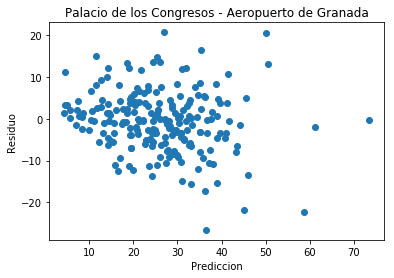

In [20]:
from matplotlib import pyplot as plt
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Prediccion')
plt.ylabel('Residuo')
plt.title('Palacio de los Congresos - Aeropuerto de Granada')
plt.show()

In [8]:
#Iniciamos la contruccuion optimo del modelo con eliminacion hacia atras

In [9]:
#Construccion del modelo optimo con la eliminacion hacia atras
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
SL = 0.05

In [17]:
#quitamos la 
X_opt = X[:,[0,1,4,5,6,12,13,14]]
regression_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     262.6
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          5.27e-227
Time:                        17:00:11   Log-Likelihood:                -3745.3
No. Observations:                1075   AIC:                             7507.
Df Residuals:                    1067   BIC:                             7546.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0414      1.244      2.446      0.015       0.601       5.482
x1             0.5718      0.039     14.510      0.000       0.494       0.649
x2             0.1029      0.056      1.833      0.067      -0.007       0.213
x3            -0.0191      0.007     -2.741      0.006      -0.033      -0.005
x4            -0.2432      0.072     -3.388      0.001      -0.384      -0.102
x5             0.9555      0.118      8.103      0.000       0.724       1.187
x6            -0.8079      0.130     -6.231      0.000      -1.062      -0.553
x7            -0.4615      0.207     -2.230      0.026      -0.868      -0.055
==============================================================================
Omnibus:                      205.305   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              793.679
Skew:                           0.868   Prob(JB):                    4.52e-173
Kurtosis:                       6.835   Cond. No.                         327.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
regression_opt = LinearRegression()
regression_opt.fit(X_train[:,[0,3,4,5,11,12,13]],y_train)
y_pred_opt = regression_opt.predict(X_test[:,[0,3,4,5,11,12,13]])

#resultado_opt = evaluate(regression_opt, X_test[:,[0,3,4,5,11,12,13]], y_test)
#score_opt = regression_opt.score(X_train[:,[0,3,4,5,11,12,13]],y_train)
print('Metricas sobre la prediccion Modificada')
print('R^2:',r2_score(y_test, y_pred_opt))
print('MSE:',mean_squared_error(y_test, y_pred_opt))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred_opt)))

Metricas sobre la prediccion Modificada
R^2: 0.6336103407450091
MSE: 51.31741479481325
RMSE: 7.16361743777634


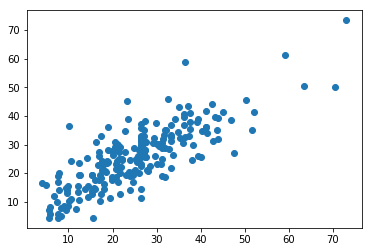

In [19]:
from matplotlib import pyplot as plt
y_pred = regression.predict(X_test)
plt.scatter(y_test, y_pred)